# Box-Cox transformation

In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [5]:
plt.rcParams["figure.dpi"] = 450

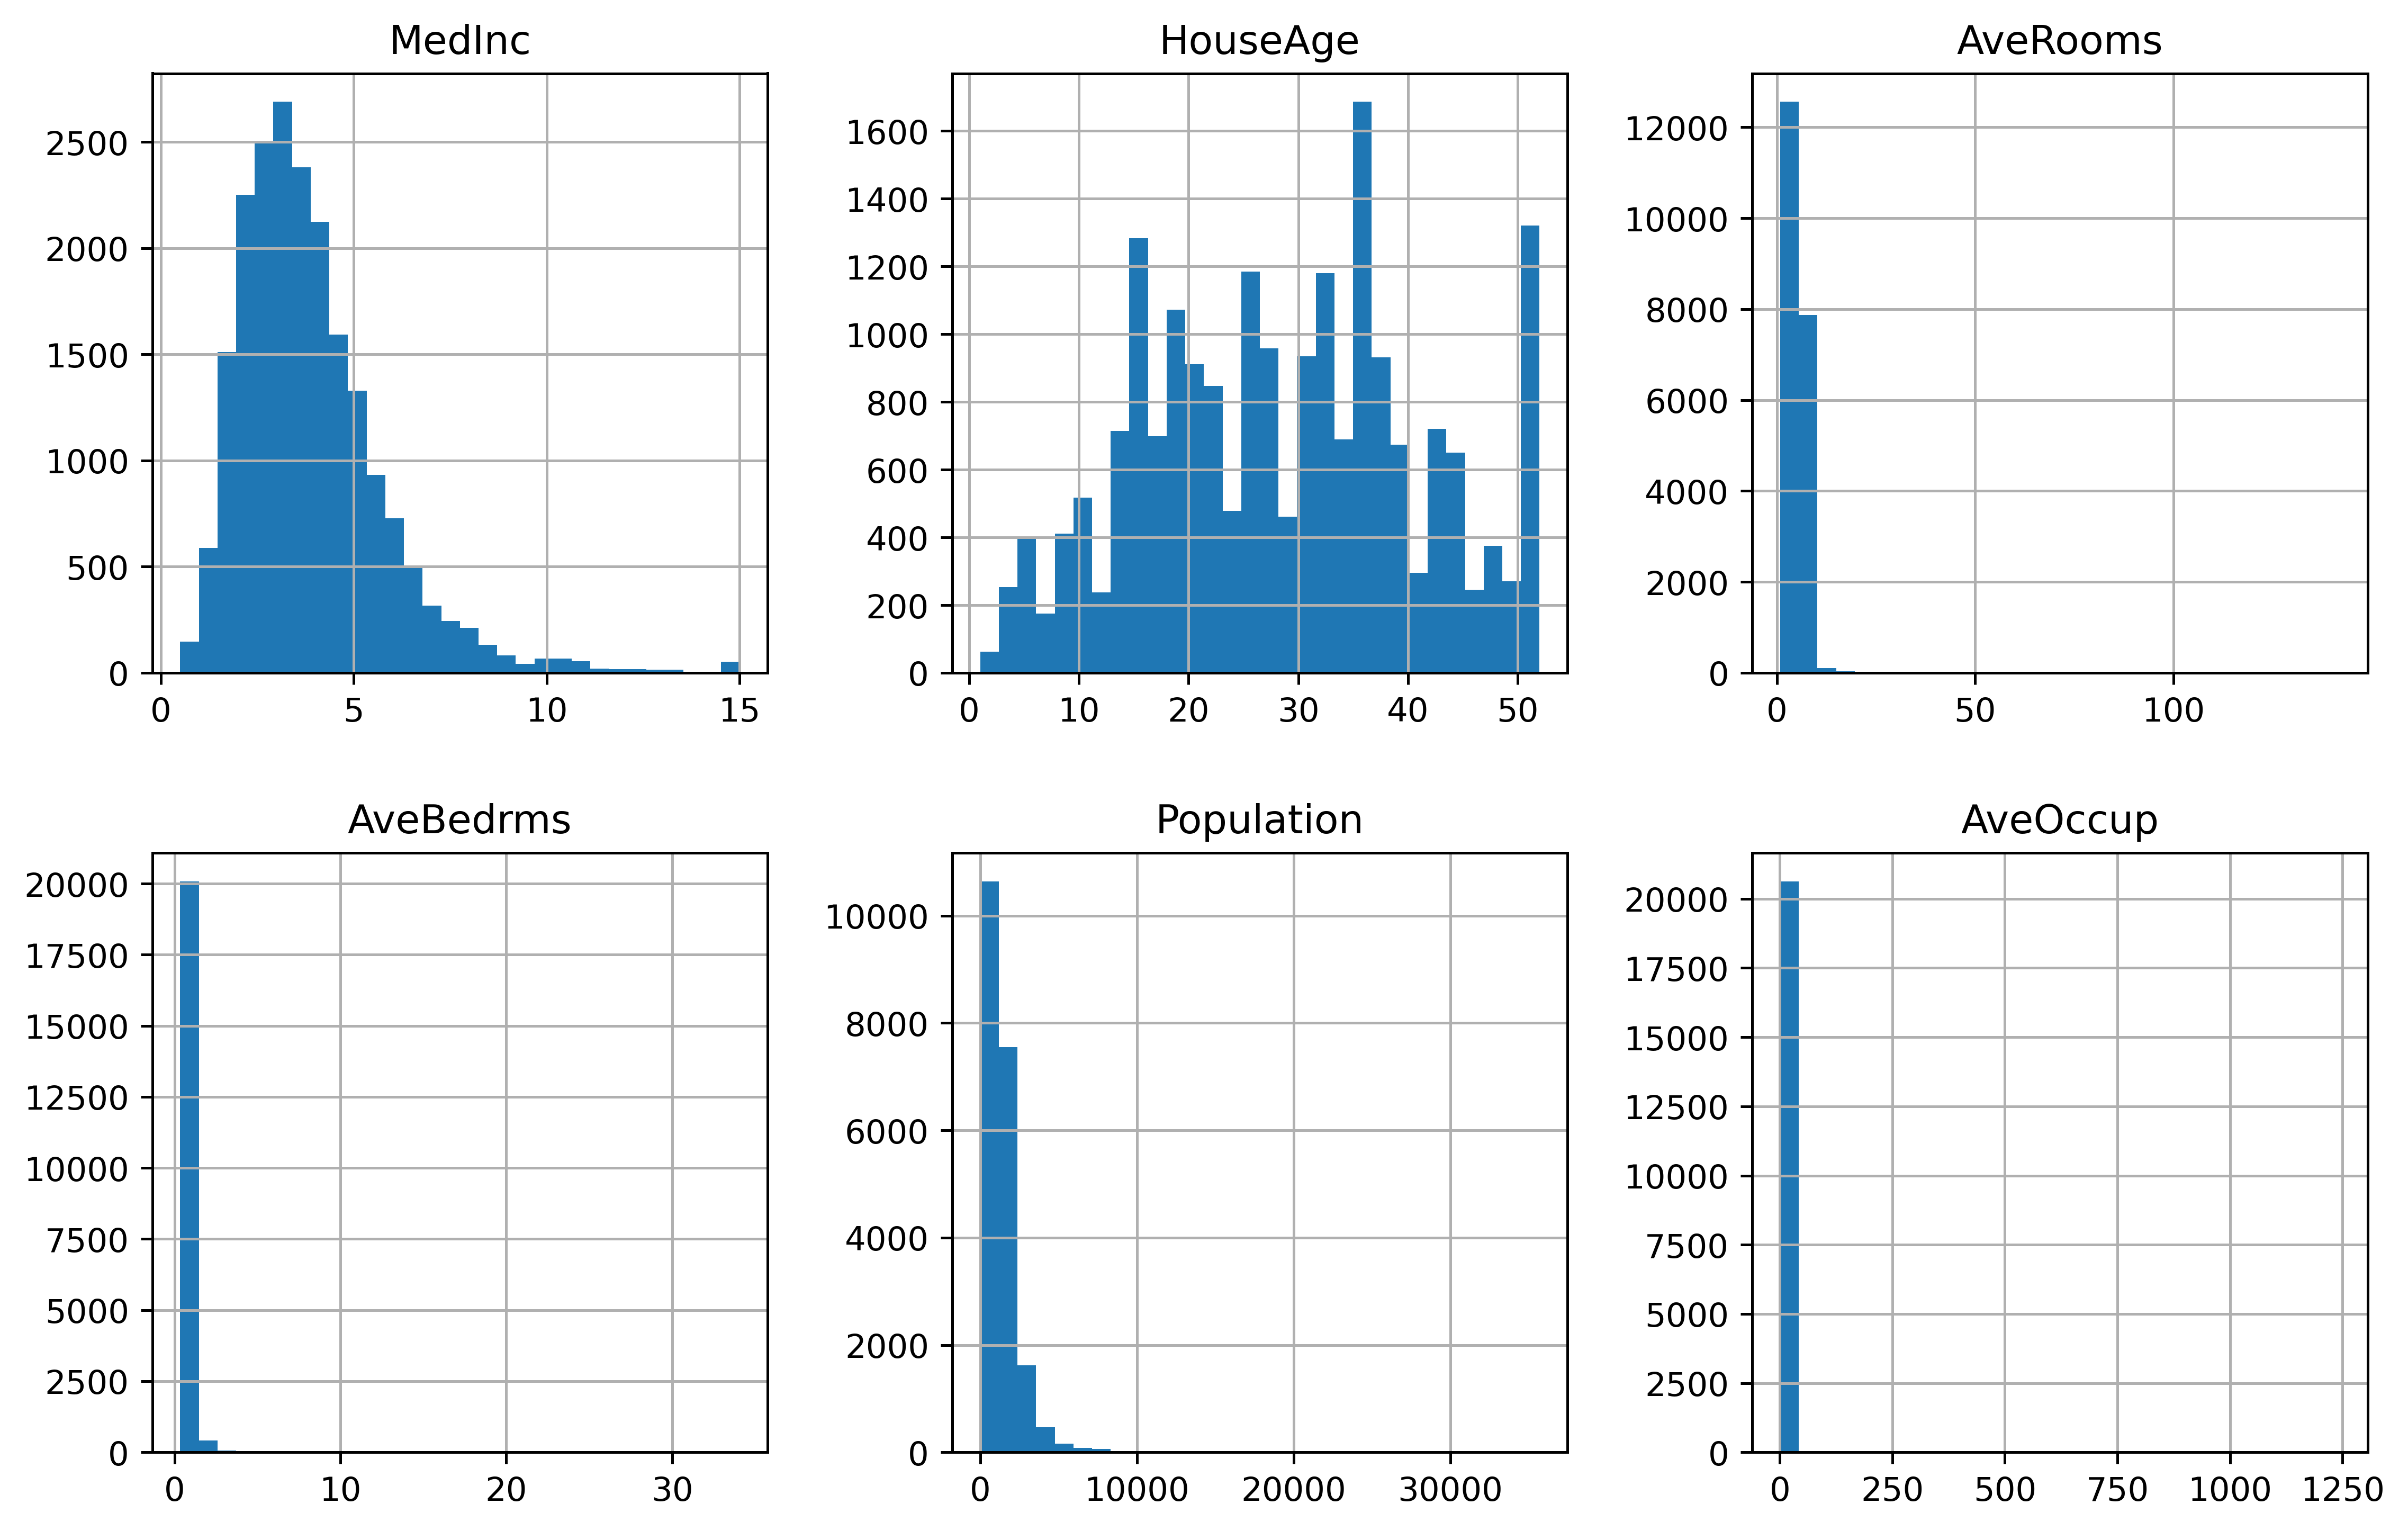

In [6]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [7]:
# capture variable names in a list

variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [8]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

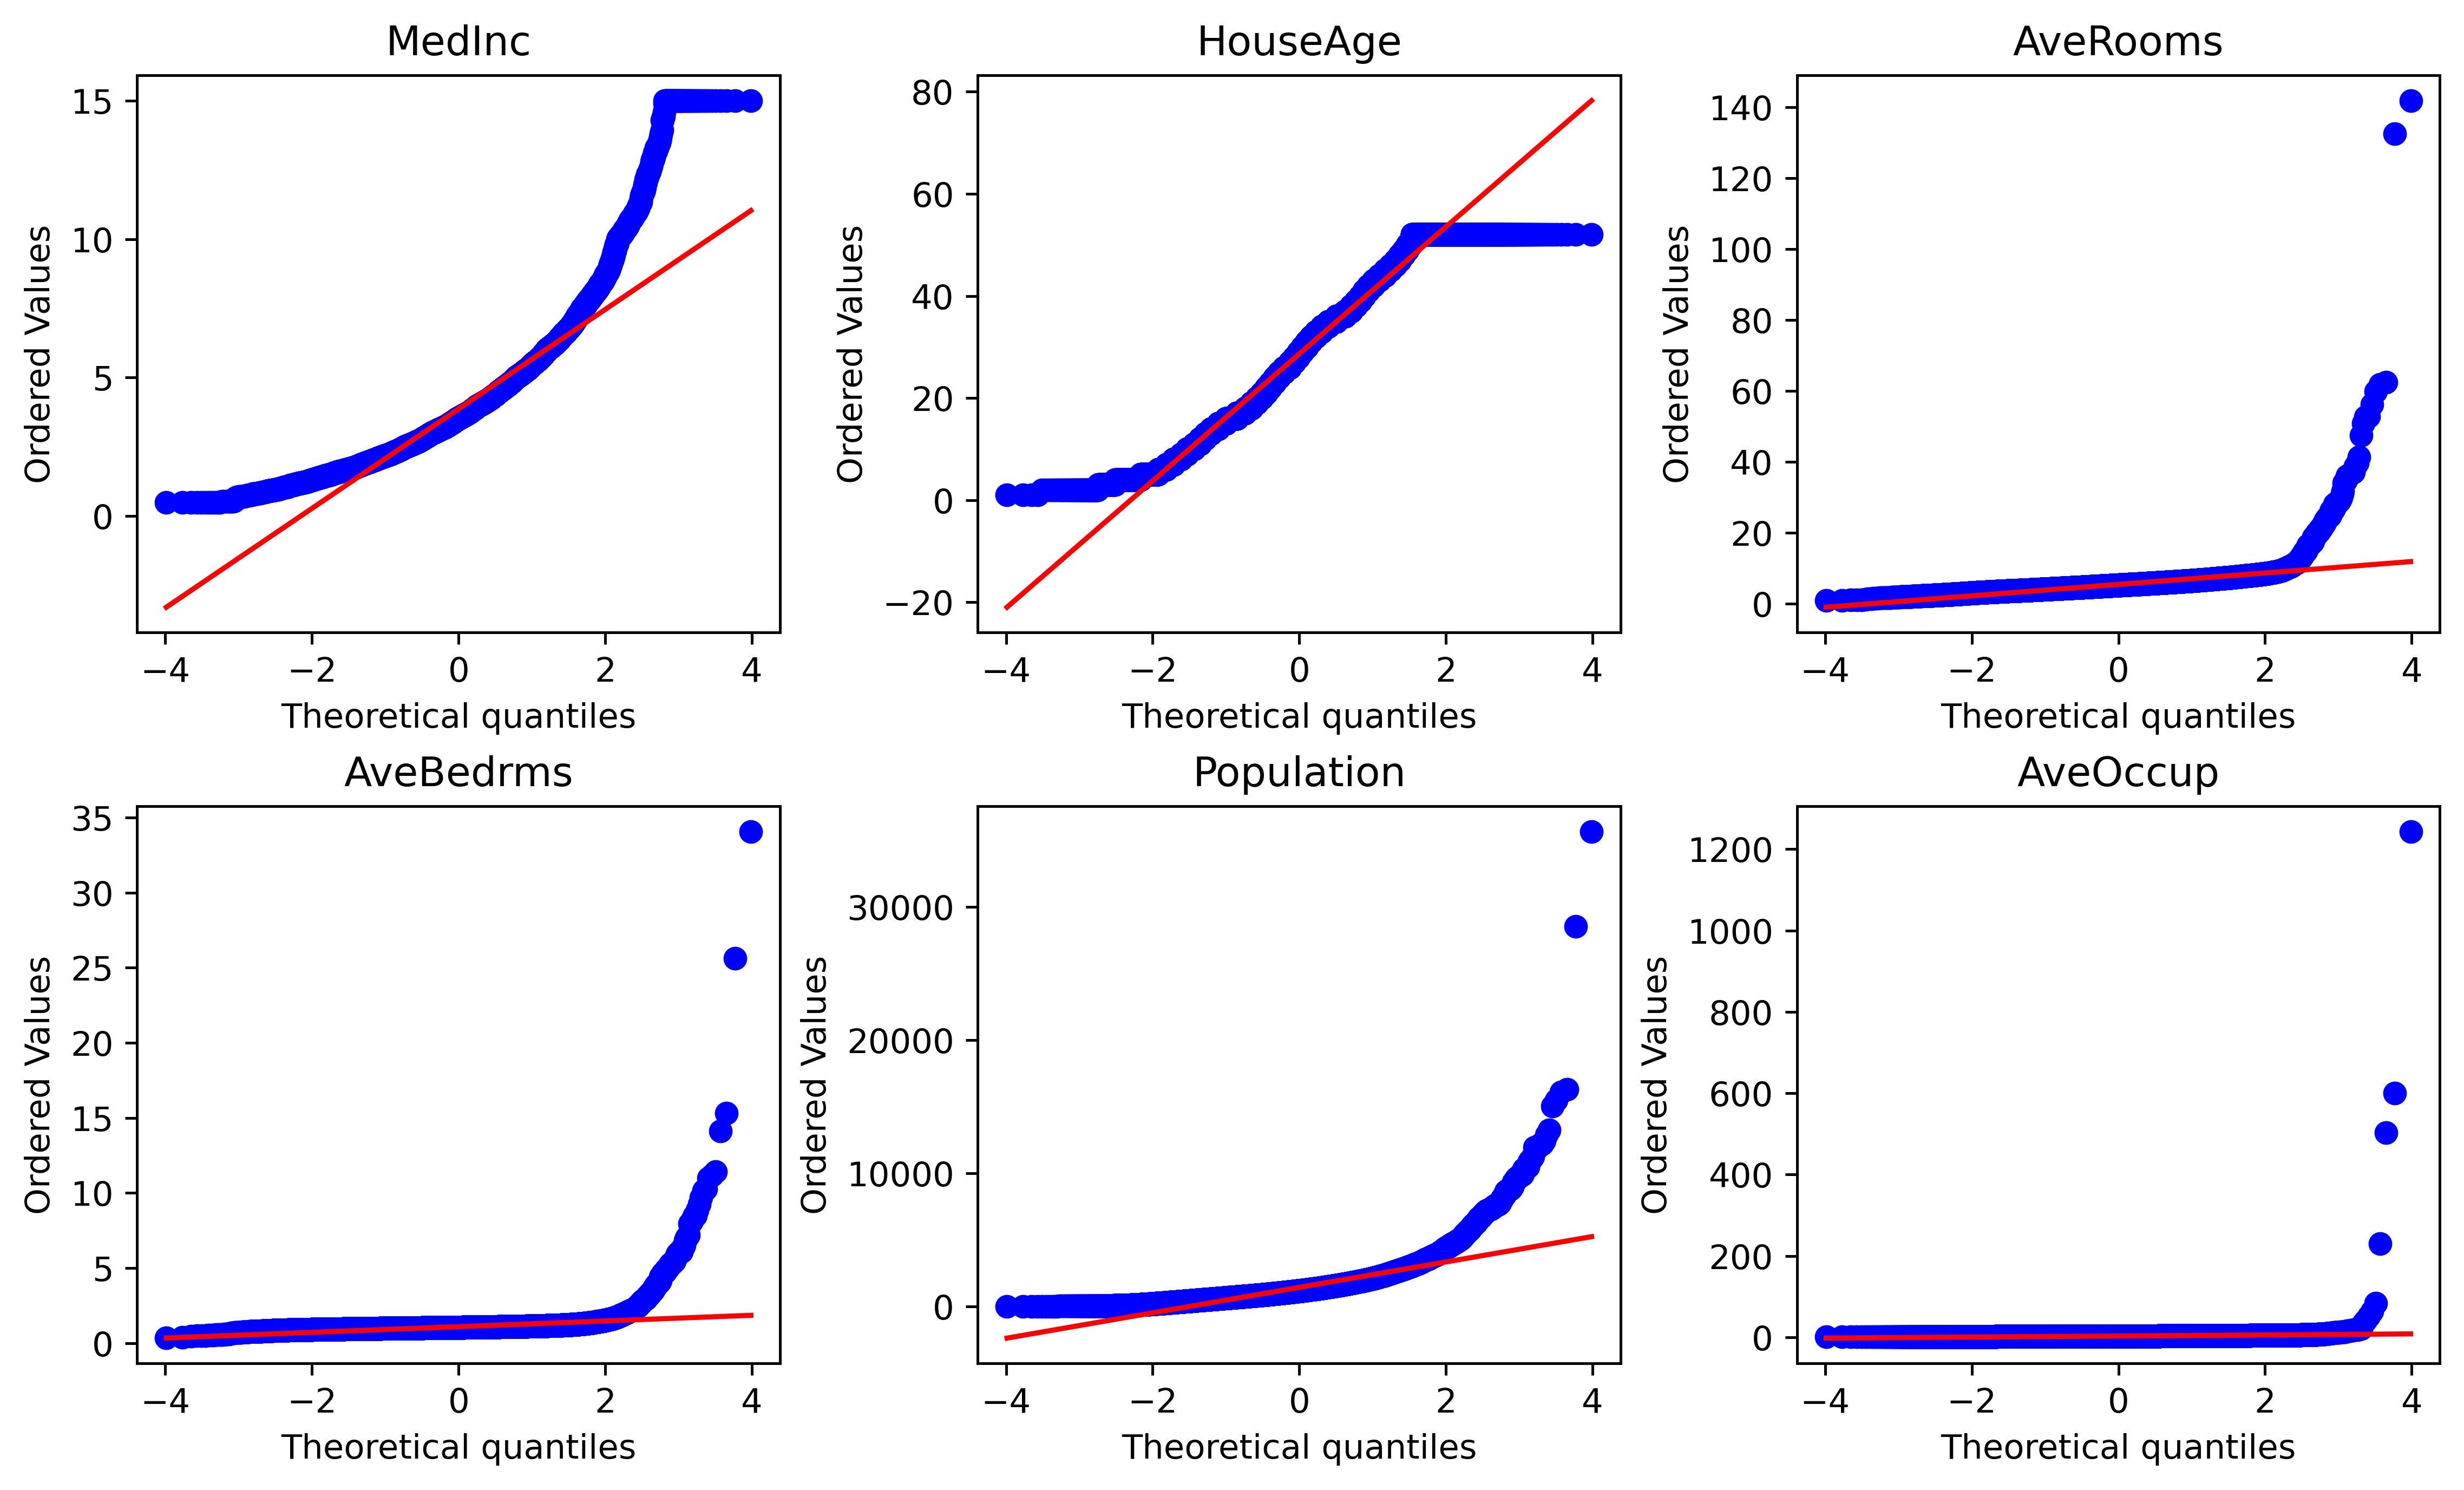

In [9]:
make_qqplot(X)

# Box-Cox transformation with Scikit-learn

In [10]:
# initialize the transformer with box-cox

transformer = PowerTransformer(method="box-cox", standardize=False)

In [11]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [12]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [13]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

array([[ 2.33706858e+00,  2.37232164e+01,  1.47534996e+00,
         2.30852288e-02,  1.23081165e+01,  7.56645476e-01],
       [ 2.33359826e+00,  1.32869543e+01,  1.41097764e+00,
        -2.91954350e-02,  2.23353410e+01,  6.28291074e-01],
       [ 2.17169053e+00,  2.90174591e+01,  1.56886594e+00,
         6.69359792e-02,  1.40826537e+01,  8.14314548e-01],
       ...,
       [ 5.43627084e-01,  1.10039339e+01,  1.30322965e+00,
         1.03551405e-01,  1.74122740e+01,  6.94971200e-01],
       [ 6.42492996e-01,  1.15834800e+01,  1.31757456e+00,
         1.39801581e-01,  1.59016207e+01,  6.32710121e-01],
       [ 9.06073643e-01,  1.04178493e+01,  1.30897227e+00,
         1.33369186e-01,  1.91100827e+01,  7.71751676e-01]])

In [14]:
# transform NumPy array to pandas dataframe

X_tf = pd.DataFrame(X_tf, columns=variables)

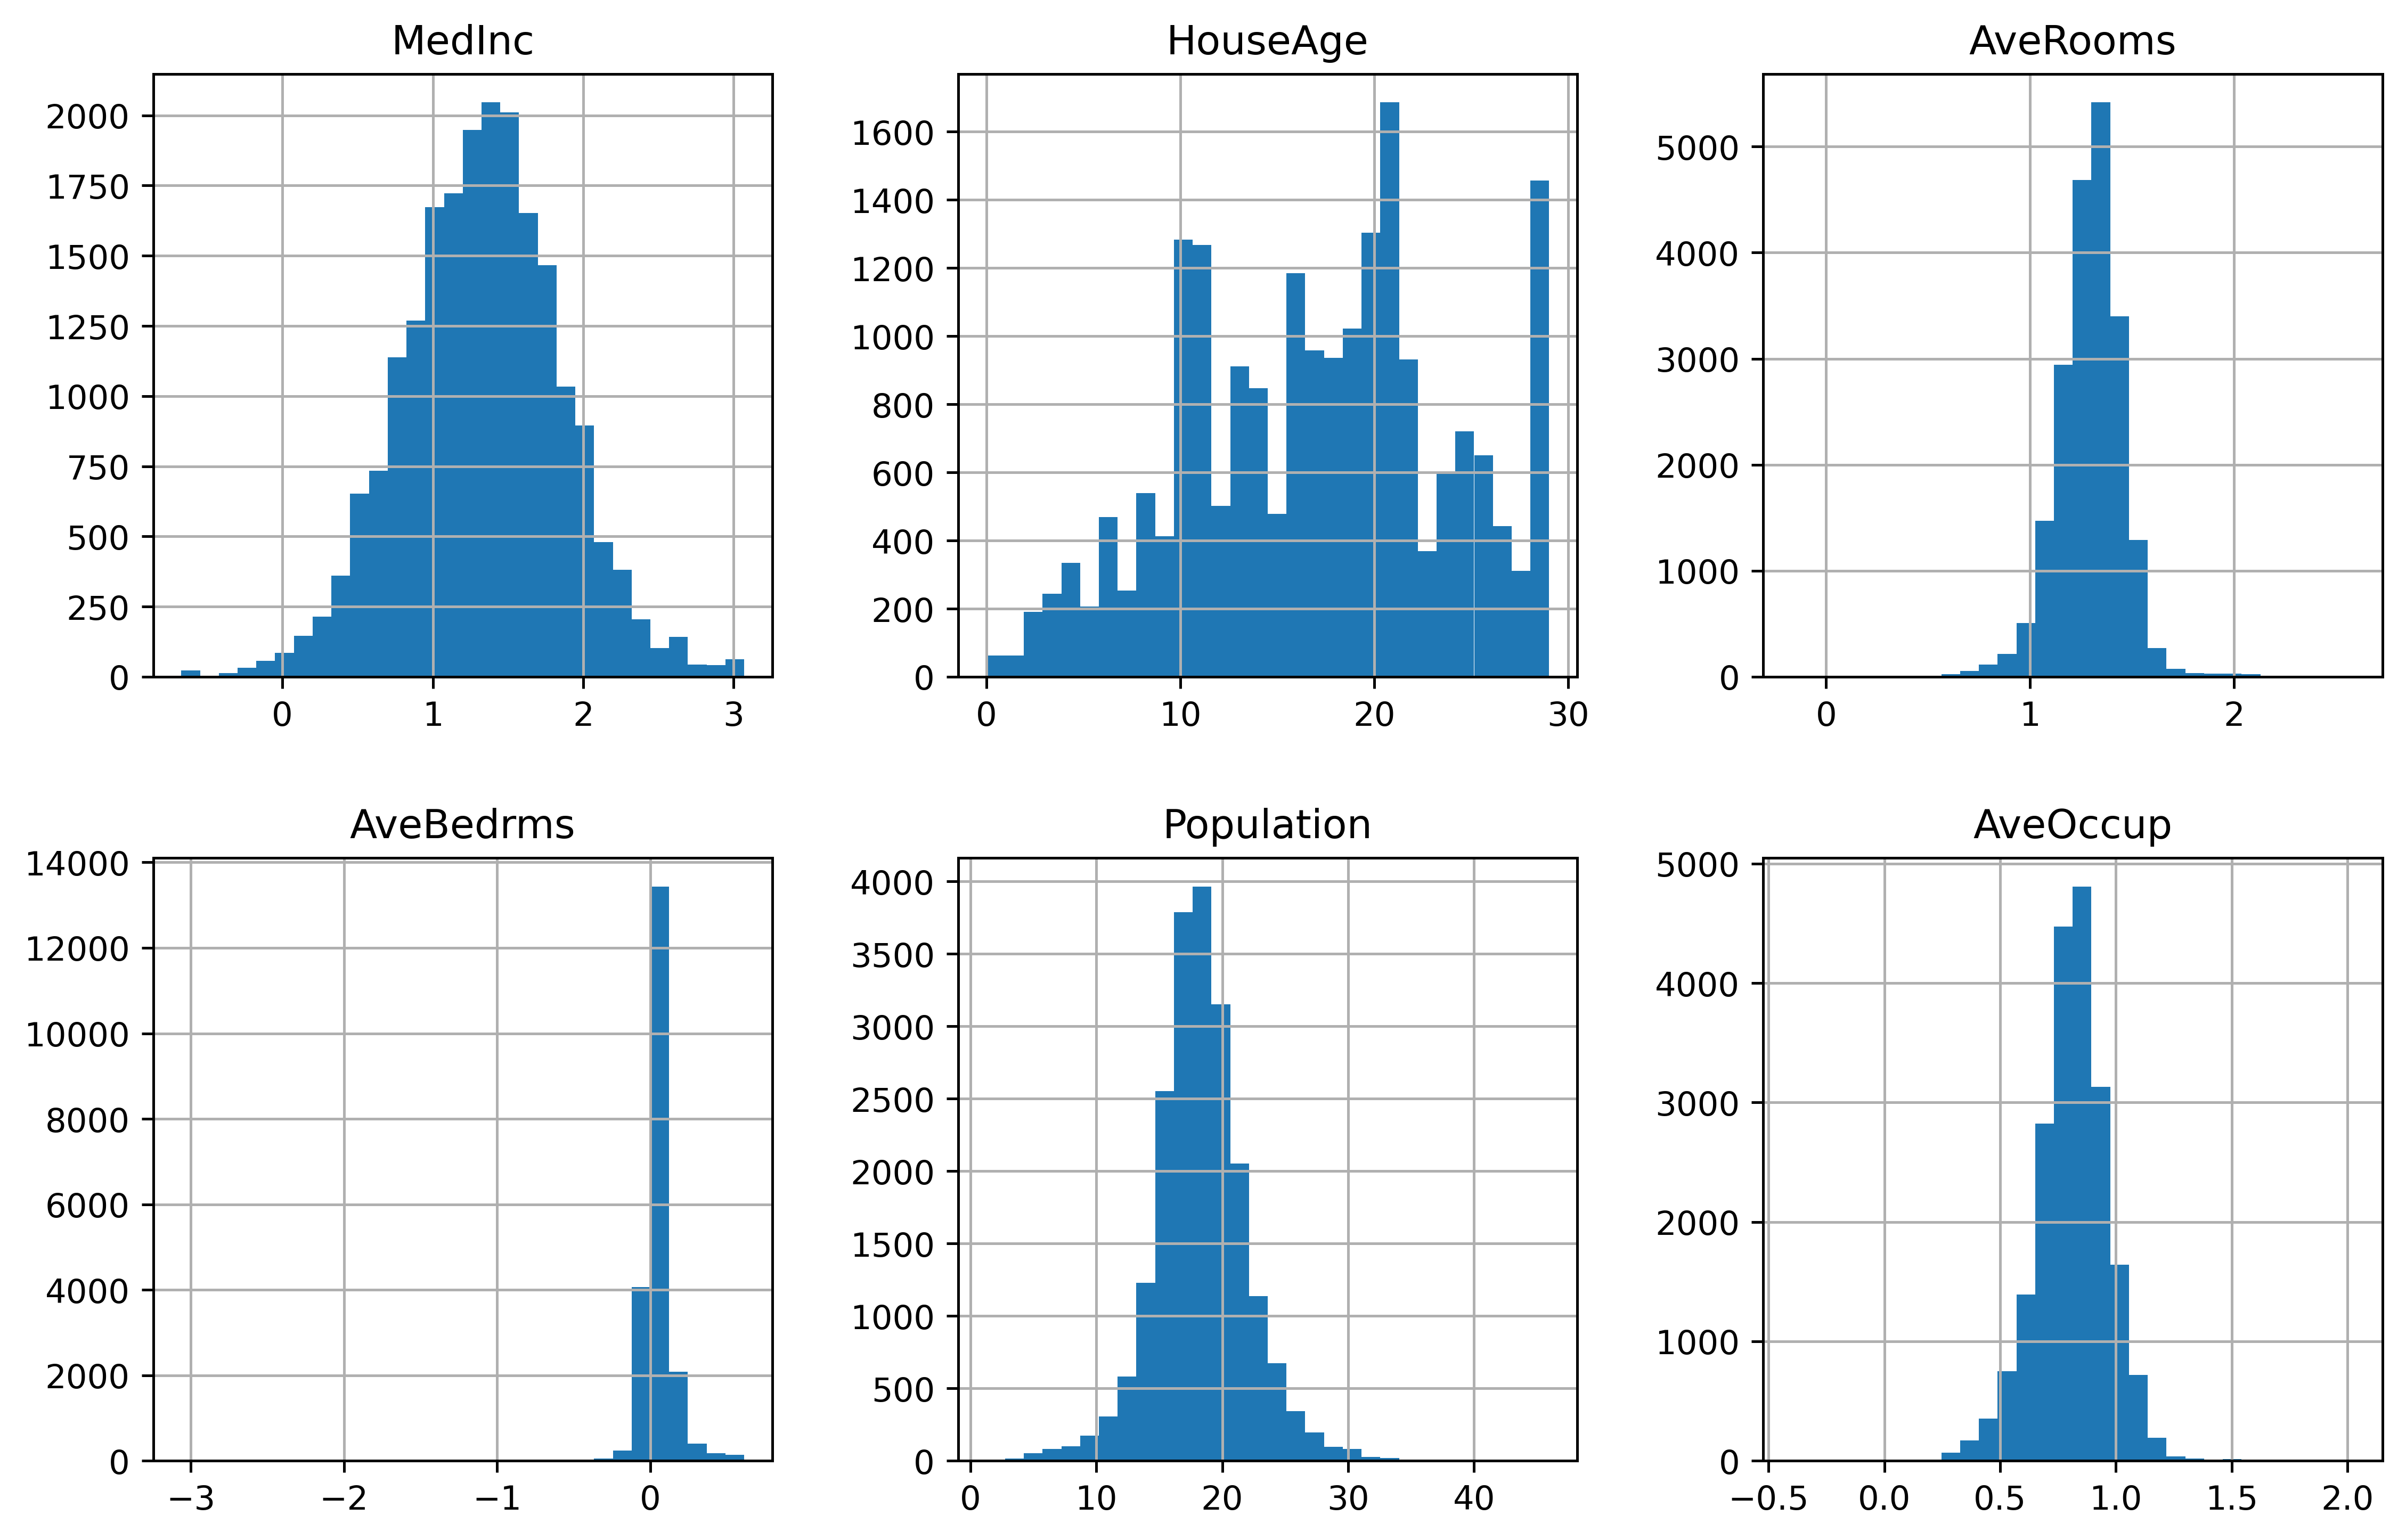

In [15]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

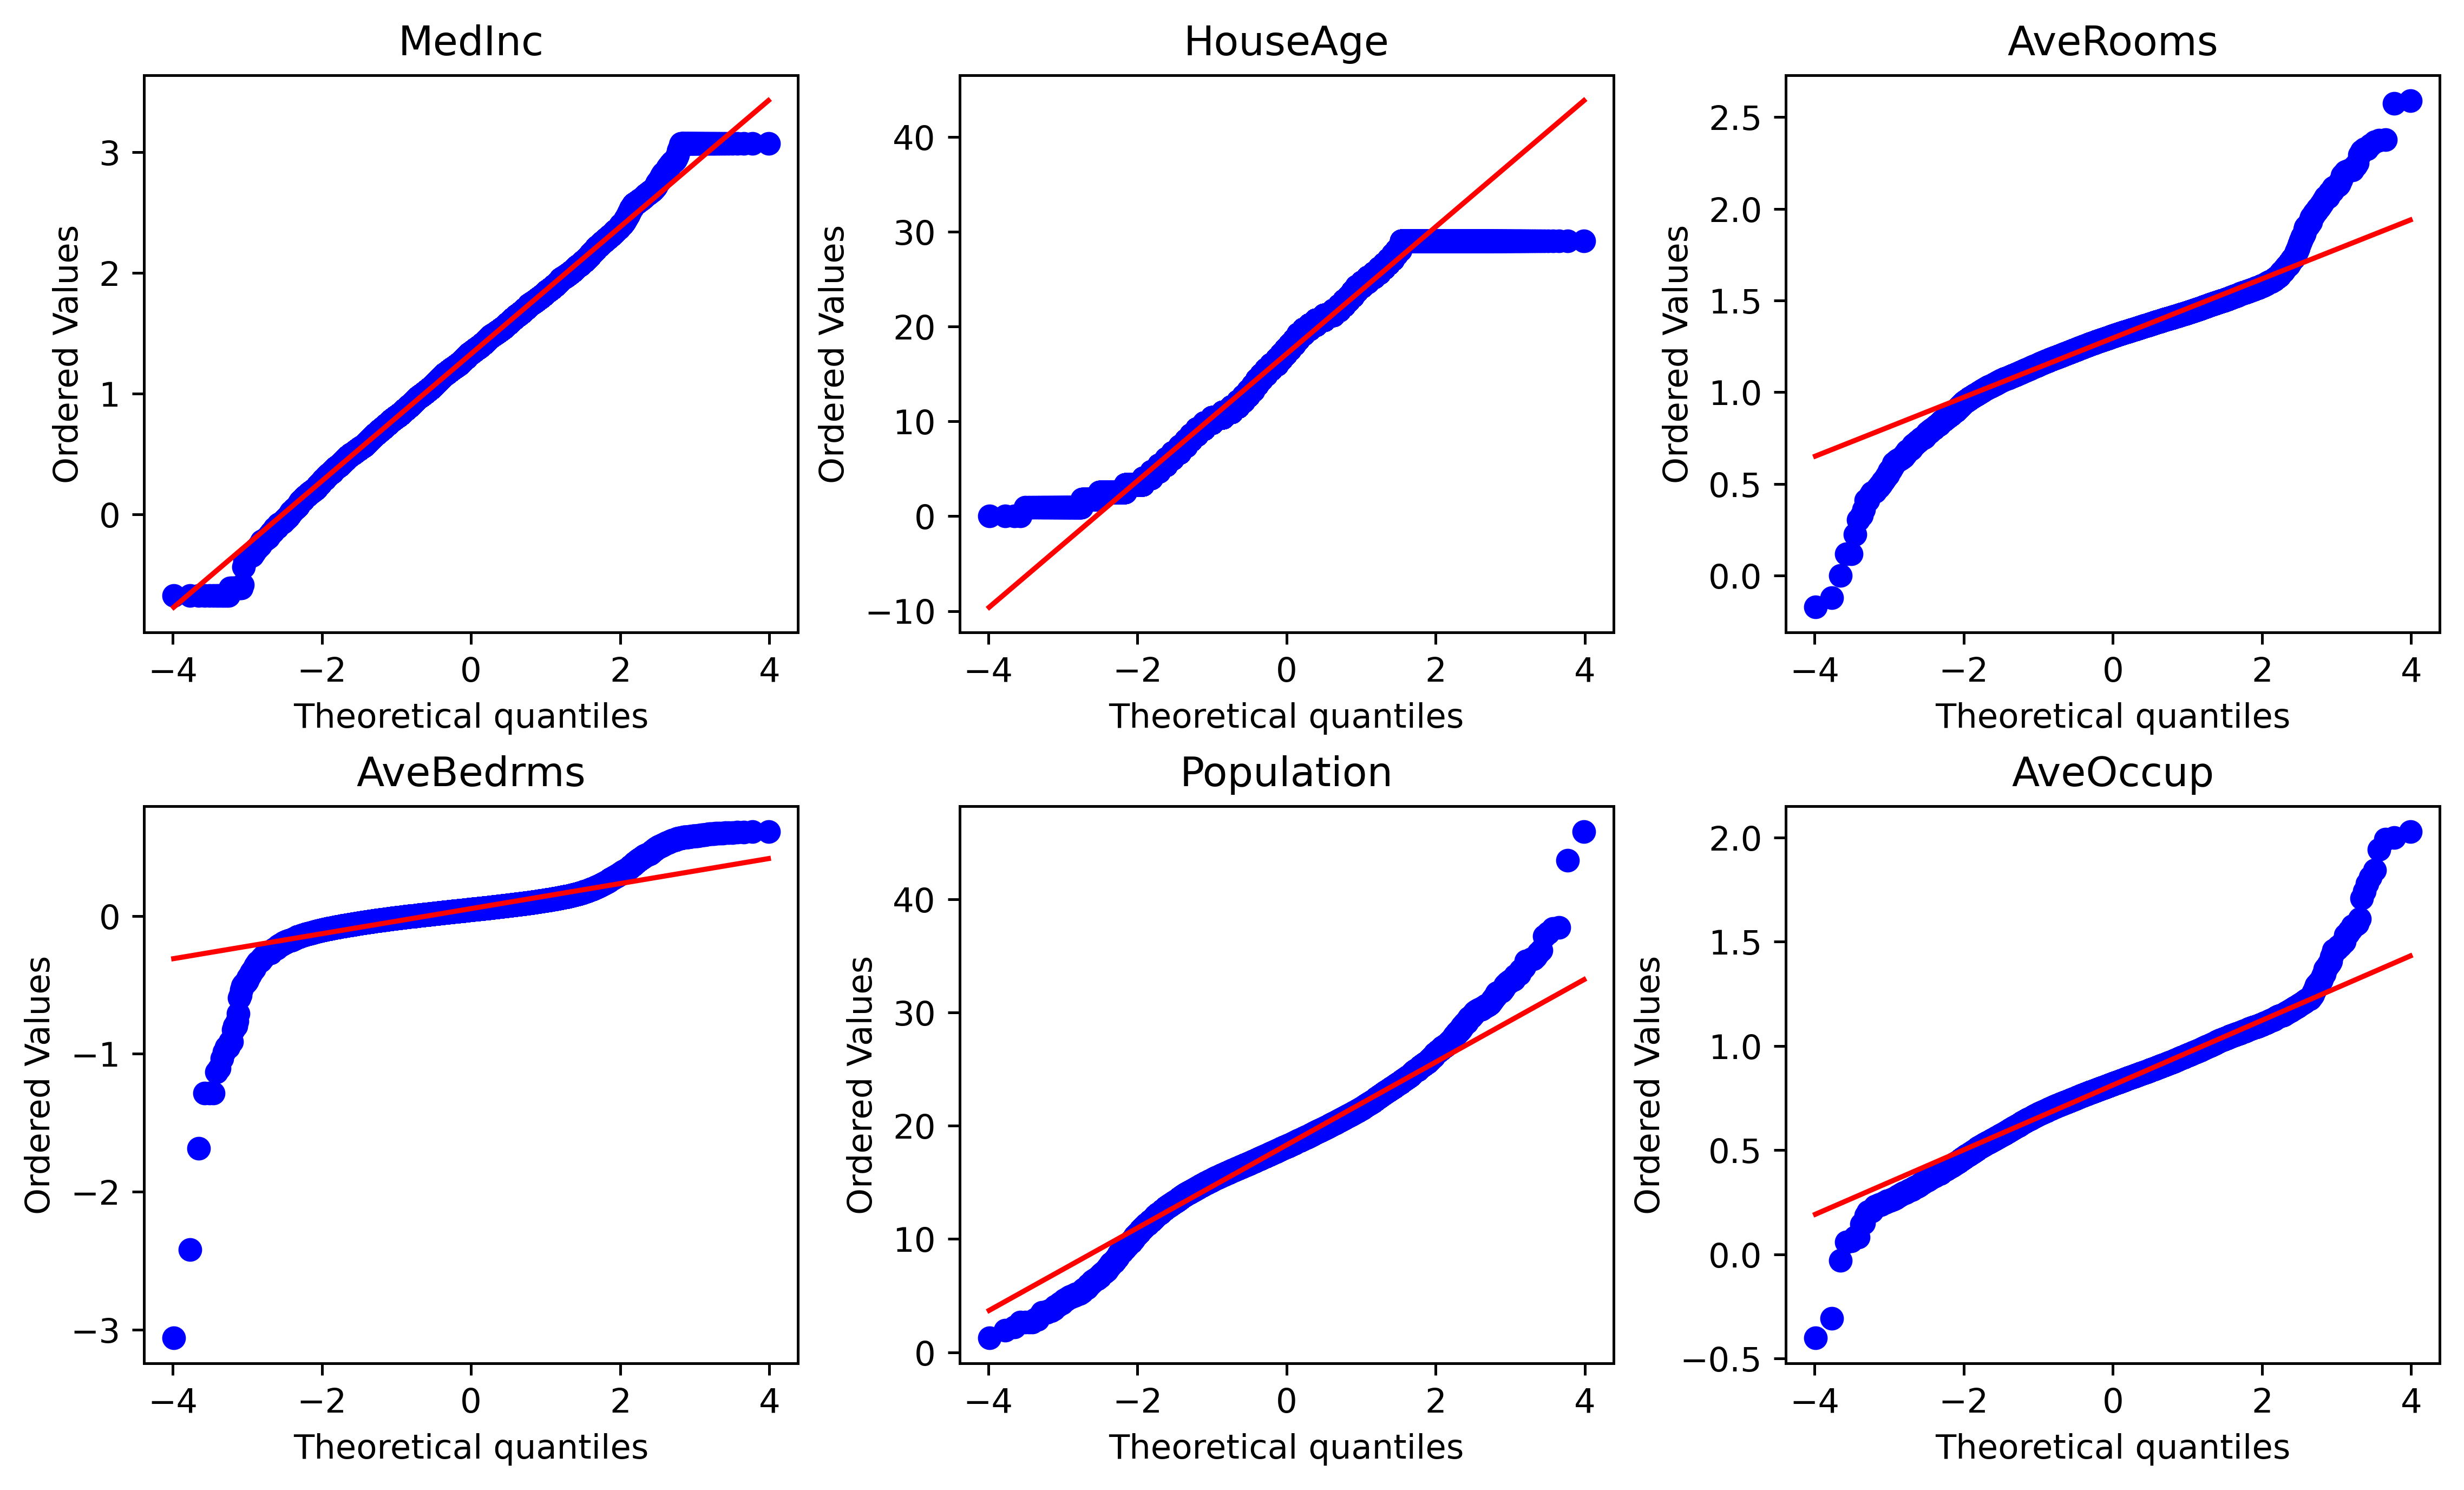

In [16]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)

# Box-Cox transformation with Feature-engine

In [14]:
# set up the transformer: automatically identifies numerical variables

bct = BoxCoxTransformer()

# fit transformer to the data set
bct.fit(X)

BoxCoxTransformer()

In [15]:
# the exponents for each variable

bct.lambda_dict_

{'MedInc': 0.09085449361507383,
 'HouseAge': 0.8093980940712507,
 'AveRooms': -0.2980048976549959,
 'AveBedrms': -1.6290002625859639,
 'Population': 0.23576757812051324,
 'AveOccup': -0.4763032278973292}

In [16]:
# transform variables: returns a new dataframe

X_tf = bct.transform(X)

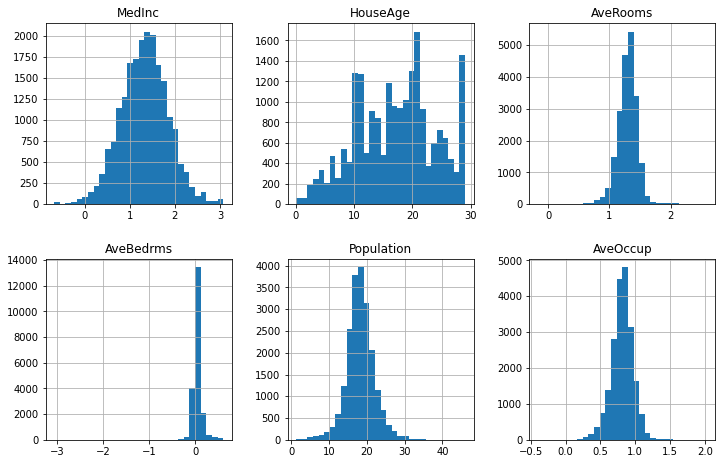

In [17]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

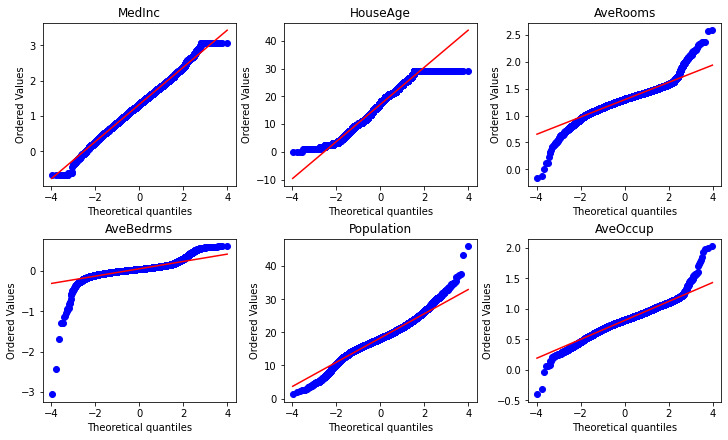

In [18]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)

# Box-Cox transformation with SciPy

One variable at a time.

In [19]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

Optimal λ:  0.09085449361507383


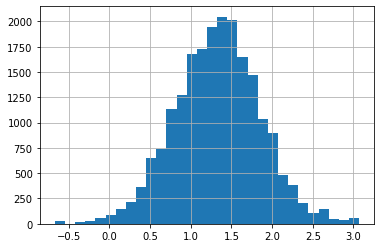

In [20]:
# apply the Box-Cox transformation to variable MedInc
X_tf["MedInc"], param = stats.boxcox(X["MedInc"])

# print the optimal lambda found for MedInc
print("Optimal λ: ", param)

# visualize the transformed variable
X_tf["MedInc"].hist(bins=30)
plt.show()